## Python and MySQL: ```mysql.connector``` (60 Minute)

- See: https://www.mysql.com/products/workbench
- See: https://hub.docker.com/_/mysql
- Mac -> Terminal
- Windows -> PowerShell

```bash
$ docker run -d  --name mysqldb -p 3306:3306 -e MYSQL_ROOT_PASSWORD=password mysql:latest
$ docker images
$ docker ps
$ docker exec -it mysqldb bash
$ mysql -u root -ppassword
```
```
mysql> show databases;
mysql> show databases;
mysql> use lahmansbaseballdb;
mysql> show tables;
```

**MySQL Workbench** -> Database | Connect to Database -> 127.0.0.1, Port 3306
Execute: ```show databases;```

```bash
$ curl.exe -O https://raw.githubusercontent.com/WebucatorTraining/lahman-baseball-mysql/master/lahman-mysql-dump.sql
```

**MySQL Workbench** -> File -> Open SQL Script -> lahman-mysql-dump.sql -> execute

```sql
USE `lahmansbaseballdb`;
 SELECT p.nameFirst, p.nameLast, b.HR, t.name AS team, b.yearID
 FROM batting b
     JOIN people p ON p.playerID = b.playerID
     JOIN teams t ON t.ID = b.team_ID
 WHERE b.YearID = 1977
 ORDER BY b.HR DESC
 LIMIT 5;
```

![MySQL Workbench](MySQLWorkbench.png)

## Access the Database Using ```mysql-connector-python```

- You need to run ```conda install -c conda-forge mysql-connector-python```

In [32]:
import platform
import sys
import ssl

print("os:            " + platform.platform())
print("python         " + sys.version)
print("openssl:       " + ssl.OPENSSL_VERSION)
print("TLSv1.2:       " + str(ssl.PROTOCOL_TLSv1_2))

os:            Windows-10-10.0.19041-SP0
python         3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
openssl:       OpenSSL 1.1.1i  8 Dec 2020
TLSv1.2:       _SSLMethod.PROTOCOL_TLSv1_2


## Simple Query Examples

**ALSO NOTE:** More lahmans baseball database examples (including Scikit-Learn), see:
* [Scikit-Learn Tutorial: Baseball Analytics Pt 1](https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-1)
* [Scikit-Learn Tutorial: Baseball Analytics Pt 2](https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-2)


In [33]:
# conda install -c conda-forge mysql-connector-python

import mysql.connector as mysql

cnx = mysql.connect(
    host="127.0.0.1",                                     # Running in docker container described above
    user="root",                                          # in real life you would not use *root*
    password="password",                                  # in real life you would not use *password*
    port=3306,
    ssl_disabled=True,                                    # not usually suitable for production code
    database="lahmansbaseballdb")
print(cnx)
cmd = "SHOW DATABASES"
with cnx.cursor() as cursor:
    cursor.execute(cmd)
    for row in cursor:
        print(row)

('information_schema',)
('lahmansbaseballdb',)
('mysql',)
('performance_schema',)
('sys',)


## You can query database directly using ```pandas.read_sql()```

In [34]:
import pandas as pd

df = pd.read_sql("""
SELECT p.nameFirst, p.nameLast FROM people p
ORDER BY p.nameLast, p.nameFirst
""", cnx)

print(type(df))
print()
print(df.head(3))
print()
print(df.info())

<class 'pandas.core.frame.DataFrame'>

  nameFirst nameLast
0     David  Aardsma
1      Hank    Aaron
2    Tommie    Aaron

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19878 entries, 0 to 19877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nameFirst  19841 non-null  object
 1   nameLast   19878 non-null  object
dtypes: object(2)
memory usage: 310.7+ KB
None


## You can execute any SQL statement using ```cursor.execute()```

In [35]:
cmd = "SELECT * FROM batting LIMIT 10"
with cnx.cursor() as cursor:
    cursor.execute(cmd)
    rows = cursor.fetchall()
    for row in rows:
        print(row)

(1, 'abercda01', 1871, 1, 'TRO', 8, 'NA', 1, None, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, None, None, None, None, 0)
(2, 'addybo01', 1871, 1, 'RC1', 7, 'NA', 25, None, 118, 30, 32, 6, 0, 0, 13, 8, 1, 4, 0, None, None, None, None, 0)
(3, 'allisar01', 1871, 1, 'CL1', 3, 'NA', 29, None, 137, 28, 40, 4, 5, 0, 19, 3, 1, 2, 5, None, None, None, None, 1)
(4, 'allisdo01', 1871, 1, 'WS3', 9, 'NA', 27, None, 133, 28, 44, 10, 2, 2, 27, 1, 1, 0, 2, None, None, None, None, 0)
(5, 'ansonca01', 1871, 1, 'RC1', 7, 'NA', 25, None, 120, 29, 39, 11, 3, 0, 16, 6, 2, 2, 1, None, None, None, None, 0)
(6, 'armstbo01', 1871, 1, 'FW1', 4, 'NA', 12, None, 49, 9, 11, 2, 1, 0, 5, 0, 1, 0, 1, None, None, None, None, 0)
(7, 'barkeal01', 1871, 1, 'RC1', 7, 'NA', 1, None, 4, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, None, None, None, None, 0)
(8, 'barnero01', 1871, 1, 'BS1', 1, 'NA', 31, None, 157, 66, 63, 10, 9, 0, 34, 11, 6, 13, 1, None, None, None, None, 1)
(9, 'barrebi01', 1871, 1, 'FW1', 4, 'NA', 1, None, 5, 1, 1, 1, 0, 0, 1, 0, 

In [37]:
sql = """
SELECT p.nameFirst, p.nameLast, b.HR, t.name AS team, b.yearID
FROM batting b
    JOIN people p ON p.playerID = b.playerID
    JOIN teams t ON t.ID = b.team_ID
WHERE b.YearID = 1977
ORDER BY b.HR DESC
LIMIT 5;
"""
with cnx.cursor() as cursor:
    cursor.execute(sql)
    results = cursor.fetchall()
    for x in results:
        print(x)

('George', 'Foster', 52, 'Cincinnati Reds', 1977)
('Jeff', 'Burroughs', 41, 'Atlanta Braves', 1977)
('Greg', 'Luzinski', 39, 'Philadelphia Phillies', 1977)
('Jim', 'Rice', 39, 'Boston Red Sox', 1977)
('Mike', 'Schmidt', 38, 'Philadelphia Phillies', 1977)


In [38]:
import pandas as pd

df = pd.DataFrame(results)
df.head()

,0,1,2,3,4
0,George,Foster,52,Cincinnati Reds,1977
1,Jeff,Burroughs,41,Atlanta Braves,1977
2,Greg,Luzinski,39,Philadelphia Phillies,1977
3,Jim,Rice,39,Boston Red Sox,1977
4,Mike,Schmidt,38,Philadelphia Phillies,1977


In [39]:
# cursor.description is a list of tuples where each tuple describes a column
# first element of each tuple is a string containing the name of the corresponding column
print(type(cursor.description))       # list
print(type(cursor.description[0]))    # tuple
print(type(cursor.description[0][0])) # string
print(cursor.description[0][0])       # "nameFirst" is the name of the first column
print(cursor.description)             # the whole thing

<class 'list'>
<class 'tuple'>
<class 'str'>
nameFirst
[('nameFirst', 253, None, None, None, None, 1, 0), ('nameLast', 253, None, None, None, None, 1, 0), ('HR', 2, None, None, None, None, 1, 32768), ('team', 253, None, None, None, None, 1, 0), ('yearID', 2, None, None, None, None, 0, 53249)]


In [40]:
from mysql.connector import FieldType

for i in range(len(cursor.description)):
  print("Column {}:".format(i+1))
  desc = cursor.description[i]
  print("  column_name = {}".format(desc[0]))
  print("  type = {} ({})".format(desc[1], FieldType.get_info(desc[1])))
  print("  null_ok = {}".format(desc[6]))
  print("  column_flags = {}".format(desc[7]))

Column 1:
  column_name = nameFirst
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 2:
  column_name = nameLast
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 3:
  column_name = HR
  type = 2 (SHORT)
  null_ok = 1
  column_flags = 32768
Column 4:
  column_name = team
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 5:
  column_name = yearID
  type = 2 (SHORT)
  null_ok = 0
  column_flags = 53249


In [41]:
headers = [i[0] for i in cursor.description] # first column tuple in the column description list
print(headers)

['nameFirst', 'nameLast', 'HR', 'team', 'yearID']


In [42]:
player = list(df[1] + ", " + df[0]) # player sssigned to list of strings each containing nameLast followed by nameFirst
print(type(player))
print(type(player[0]))
print(player)

<class 'list'>
<class 'str'>
['Foster, George', 'Burroughs, Jeff', 'Luzinski, Greg', 'Rice, Jim', 'Schmidt, Mike']


In [43]:
df = pd.DataFrame(results, columns =[headers[0], headers[1], headers[2], headers[3], headers[4]], index=player)
print(df)

                nameFirst   nameLast  HR                   team  yearID
Foster, George     George     Foster  52        Cincinnati Reds    1977
Burroughs, Jeff      Jeff  Burroughs  41         Atlanta Braves    1977
Luzinski, Greg       Greg   Luzinski  39  Philadelphia Phillies    1977
Rice, Jim             Jim       Rice  39         Boston Red Sox    1977
Schmidt, Mike        Mike    Schmidt  38  Philadelphia Phillies    1977


Text(0.5, 1.0, 'Home Runs')

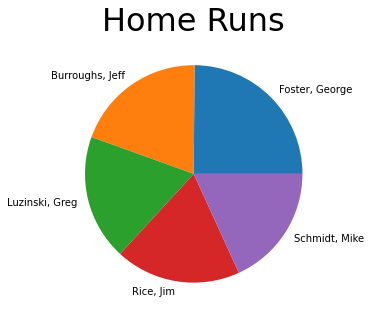

In [44]:
%matplotlib inline

df.plot(
    y="HR", kind='pie', legend=False, label="", figsize=(5, 5)
    ).set_title('Home Runs', fontdict={'fontsize': 32, 'fontweight': 'medium'})

## Create Series of  ```datetime``` from three ```numpy.int64``` values for year, month, day

In [46]:
cursor = cnx.cursor()
sql = """
SELECT p.nameFirst, p.nameLast, p.Height, p.Weight, p.throws, p.bats,
p.birthYear, p.birthMonth, p.birthDay,p.birthCountry, b.*
FROM people p
JOIN batting b ON b.playerID = p.playerID
WHERE yearID between 2014 and 2019 AND b.g >= "50"
ORDER BY b.yearID Desc
LIMIT 25;
"""
cursor.execute(sql)
results = cursor.fetchall()
df_baseball = pd.DataFrame(results)
print(df_baseball)

           0          1   2    3  4  5     6   7   8          9   ...   25  \
0      Justin      Upton  73  215  R  R  1987   8  25        USA  ...   40   
1        Luke       Voit  75  225  R  R  1991   2  13        USA  ...   62   
2     Stephen       Vogt  72  225  R  L  1984  11   1        USA  ...   40   
3         Dan  Vogelbach  72  250  R  L  1992  12  17        USA  ...   76   
4    Jonathan     Villar  73  215  R  B  1991   5   2       D.R.  ...   73   
5        Alex    Verdugo  72  212  L  L  1996   5  15        USA  ...   44   
6   Christian    Vazquez  69  195  R  R  1990   8  21       P.R.  ...   72   
7    Ildemaro     Vargas  72  170  R  B  1991   7  16  Venezuela  ...   24   
8        Josh   VanMeter  71  165  R  L  1995   3  10        USA  ...   23   
9         Gio    Urshela  72  220  R  R  1991  10  11   Colombia  ...   74   
10       Luis      Urias  69  185  R  R  1997   6   3     Mexico  ...   24   
11       Joey      Votto  74  220  R  L  1983   9  10        CAN

In [47]:
print(type(cursor.description))
print(type(cursor.description[0]))
print(len(cursor.description))
print(cursor.description)

<class 'list'>
<class 'tuple'>
35
[('nameFirst', 253, None, None, None, None, 1, 0), ('nameLast', 253, None, None, None, None, 1, 0), ('Height', 3, None, None, None, None, 1, 32768), ('Weight', 3, None, None, None, None, 1, 32768), ('throws', 253, None, None, None, None, 1, 0), ('bats', 253, None, None, None, None, 1, 0), ('birthYear', 3, None, None, None, None, 1, 32768), ('birthMonth', 3, None, None, None, None, 1, 32768), ('birthDay', 3, None, None, None, None, 1, 32768), ('birthCountry', 253, None, None, None, None, 1, 0), ('ID', 3, None, None, None, None, 0, 49667), ('playerID', 253, None, None, None, None, 0, 20489), ('yearID', 2, None, None, None, None, 0, 53249), ('stint', 2, None, None, None, None, 0, 53249), ('teamID', 254, None, None, None, None, 1, 0), ('team_ID', 3, None, None, None, None, 1, 49160), ('lgID', 254, None, None, None, None, 1, 16392), ('G', 2, None, None, None, None, 1, 32768), ('G_batting', 2, None, None, None, None, 1, 32768), ('AB', 2, None, None, None, No

In [48]:
headers = [i[0] for i in cursor.description]
print(headers)
print(type(headers))

['nameFirst', 'nameLast', 'Height', 'Weight', 'throws', 'bats', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'ID', 'playerID', 'yearID', 'stint', 'teamID', 'team_ID', 'lgID', 'G', 'G_batting', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']
<class 'list'>


In [49]:
playerName = list(df_baseball[0] + ", " + df_baseball[1])
df_baseball = pd.DataFrame(results, columns = 
    [headers[0],headers[1],headers[2],headers[3],headers[4],headers[5],headers[6],
    headers[7],headers[8],headers[9],headers[10],headers[11],headers[12],
    headers[13],headers[14],headers[15],headers[16],headers[17],headers[18],
    headers[19],headers[20],headers[21],headers[22],headers[23],headers[24],
    headers[25],headers[26],headers[27],headers[28],headers[29],headers[30],
    headers[31],headers[32],headers[33],headers[34]], index=playerName)

print(df_baseball.head())

                 nameFirst   nameLast  Height  Weight throws bats  birthYear  \
Justin, Upton       Justin      Upton      73     215      R    R       1987   
Luke, Voit            Luke       Voit      75     225      R    R       1991   
Stephen, Vogt      Stephen       Vogt      72     225      R    L       1984   
Dan, Vogelbach         Dan  Vogelbach      72     250      R    L       1992   
Jonathan, Villar  Jonathan     Villar      73     215      R    B       1991   

                  birthMonth  birthDay birthCountry  ...  RBI  SB  CS  BB  \
Justin, Upton              8        25          USA  ...   40   1   1  32   
Luke, Voit                 2        13          USA  ...   62   0   0  71   
Stephen, Vogt             11         1          USA  ...   40   3   1  20   
Dan, Vogelbach            12        17          USA  ...   76   0   0  92   
Jonathan, Villar           5         2         D.R.  ...   73  40   9  61   

                   SO  IBB HBP  SH SF  GIDP  
Justin, Up

In [50]:
print(type(df_baseball['birthYear']))
print(type(df_baseball['birthMonth']))
print(type(df_baseball['birthDay']))
print(type(df_baseball['birthYear'][0]))
print(type(df_baseball['birthMonth'][1]))
print(type(df_baseball['birthDay'][2]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [51]:
# create Series containing single datetime column using three original numpy.int64 columns (note above: index=playerName)
# See: https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas
print(type(df_baseball.birthYear))    # Series
print(type(df_baseball.birthYear[0])) # numpy.int64
birthDays = pd.to_datetime(dict(year=df_baseball.birthYear, month=df_baseball.birthMonth, day=df_baseball.birthDay))
print(type(birthDays))                # Series
print(birthDays.shape)                # (25,)
print(type(birthDays[0]))             # Timestamp
print(birthDays)                      # dump contents of birthDays Series

<class 'pandas.core.series.Series'>
<class 'numpy.int64'>
<class 'pandas.core.series.Series'>
(25,)
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Justin, Upton        1987-08-25
Luke, Voit           1991-02-13
Stephen, Vogt        1984-11-01
Dan, Vogelbach       1992-12-17
Jonathan, Villar     1991-05-02
Alex, Verdugo        1996-05-15
Christian, Vazquez   1990-08-21
Ildemaro, Vargas     1991-07-16
Josh, VanMeter       1995-03-10
Gio, Urshela         1991-10-11
Luis, Urias          1997-06-03
Joey, Votto          1983-09-10
Trea, Turner         1993-06-30
Justin, Turner       1984-11-23
Cole, Tucker         1996-07-03
Mike, Trout          1991-08-07
Lou, Trivino         1991-10-01
Blake, Treinen       1988-06-30
Sam, Travis          1993-08-27
Gleyber, Torres      1996-12-13
Josh, Tomlin         1984-10-19
Charlie, Tilson      1992-12-02
Trey, Wingenter      1994-04-15
Mike, Zunino         1991-03-25
Ryan, Zimmerman      1984-09-28
dtype: datetime64[ns]


## Draw Sactter Plot to show how home runs have increased over time

In [52]:
sql = "SELECT yearID, HR FROM batting"
cursor.execute(sql)
results = cursor.fetchall()
print(results[0])
print(results[-1])

(1871, 0)
(2019, 9)


   year  hr
0  1871   0
1  1871   0
2  1871   0
3  1871   2
4  1871   0
        year  hr
107424  2019   0
107425  2019   0
107426  2019   6
107427  2019   1
107428  2019   9


<AxesSubplot:xlabel='year', ylabel='hr'>

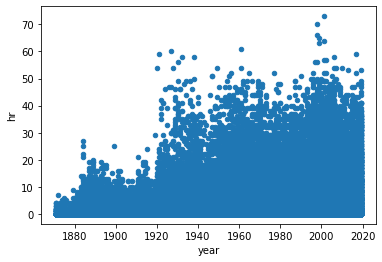

In [53]:
df = pd.DataFrame(results, columns=['year', 'hr'])
print(df.head())
print(df.tail())
df.plot.scatter(x='year', y='hr')

## Create ```DataFrame``` with calculated lifeSpan column (deathDay-birthDay)

In [60]:
sql = """
SELECT p.nameFirst,p.nameLast,p.birthYear,p.birthMonth,p.birthDay,p.birthCountry,p.deathYear,
p.deathMonth,p.deathDay,p.weight,p.height,p.bats,p.throws,p.finalGame,b.yearID,b.stint,b.teamID,b.lgID,b.G,b.AB,b.R,b.H,b.2B,b.3B,b.HR,b.RBI,b.SB,b.CS,b.BB,b.SO,b.IBB,b.HBP,b.SH,b.SF,b.GIDP,a.GP
FROM people p
    JOIN batting b
    ON p.playerID = b.playerID
    JOIN allstarfull a
    ON p.playerID = a.playerID
    ORDER BY b.HR DESC;
"""
cursor = cnx.cursor()
cursor.execute(sql)
results = cursor.fetchall()
for x in results[0:5]:
    print(x)

('Barry', 'Bonds', 1964, 7, 24, 'USA', None, None, None, 185, 73, 'L', 'L', '2007-09-26', 2001, 1, 'SFN', 'NL', 153, 476, 129, 156, 32, 2, 73, 137, 13, 3, 177, 93, 35, 9, 0, 2, 5, 1)
('Barry', 'Bonds', 1964, 7, 24, 'USA', None, None, None, 185, 73, 'L', 'L', '2007-09-26', 2001, 1, 'SFN', 'NL', 153, 476, 129, 156, 32, 2, 73, 137, 13, 3, 177, 93, 35, 9, 0, 2, 5, 1)
('Barry', 'Bonds', 1964, 7, 24, 'USA', None, None, None, 185, 73, 'L', 'L', '2007-09-26', 2001, 1, 'SFN', 'NL', 153, 476, 129, 156, 32, 2, 73, 137, 13, 3, 177, 93, 35, 9, 0, 2, 5, 1)
('Barry', 'Bonds', 1964, 7, 24, 'USA', None, None, None, 185, 73, 'L', 'L', '2007-09-26', 2001, 1, 'SFN', 'NL', 153, 476, 129, 156, 32, 2, 73, 137, 13, 3, 177, 93, 35, 9, 0, 2, 5, 1)
('Barry', 'Bonds', 1964, 7, 24, 'USA', None, None, None, 185, 73, 'L', 'L', '2007-09-26', 2001, 1, 'SFN', 'NL', 153, 476, 129, 156, 32, 2, 73, 137, 13, 3, 177, 93, 35, 9, 0, 2, 5, 1)


In [57]:
import pandas as pd

df = pd.DataFrame(results, columns = ["nameFirst","nameLast","birthYear","birthMonth","birthDay","birthCountry","deathYear",
"deathMonth","deathDay","weight","height","bats","throws","finalGame","yearID","stint","teamID","lgID","G","AB","R","H","2B","3B","HR","RBI","SB","CS","BB","SO","IBB","HBP","SH","SF","GIDP","GP"])
df.head()

,nameFirst,nameLast,birthYear,birthMonth,birthDay,birthCountry,deathYear,deathMonth,deathDay,weight,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,GP
0,Barry,Bonds,1964,7,24,USA,NaN,NaN,NaN,185,...,13,3.0,177,93,35.0,9,0,2.0,5.0,1
1,Barry,Bonds,1964,7,24,USA,NaN,NaN,NaN,185,...,13,3.0,177,93,35.0,9,0,2.0,5.0,1
2,Barry,Bonds,1964,7,24,USA,NaN,NaN,NaN,185,...,13,3.0,177,93,35.0,9,0,2.0,5.0,1
3,Barry,Bonds,1964,7,24,USA,NaN,NaN,NaN,185,...,13,3.0,177,93,35.0,9,0,2.0,5.0,1
4,Barry,Bonds,1964,7,24,USA,NaN,NaN,NaN,185,...,13,3.0,177,93,35.0,9,0,2.0,5.0,1


In [61]:
# Drop Rows with any missing value in selected columns
df = df.dropna(how='any', subset=['birthYear','birthMonth','birthDay','deathYear','deathMonth','deathDay'])
df = df.drop_duplicates(['nameFirst', 'nameLast'])
df.head()

,nameFirst,nameLast,birthYear,birthMonth,birthDay,birthCountry,deathYear,deathMonth,deathDay,weight,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,GP
59,Roger,Maris,1934,9,10,USA,1985.0,12.0,14.0,197,...,0,0.0,94,67,0.0,7,0,7.0,16.0,1
66,Babe,Ruth,1895,2,6,USA,1948.0,8.0,16.0,215,...,7,6.0,137,89,NaN,0,14,NaN,NaN,1
77,Jimmie,Foxx,1907,10,22,USA,1967.0,7.0,21.0,195,...,3,7.0,116,96,NaN,0,0,NaN,NaN,0
80,Hank,Greenberg,1911,1,1,USA,1986.0,9.0,4.0,210,...,7,5.0,119,92,NaN,3,3,NaN,NaN,0
170,Ralph,Kiner,1922,10,27,USA,2014.0,2.0,6.0,195,...,6,NaN,117,61,NaN,1,0,NaN,10.0,1


In [62]:
df['birthDays'] = pd.to_datetime(dict(year=df.birthYear, month=df.birthMonth, day=df.birthDay))
df['birthDays'].head()

59    1934-09-10
66    1895-02-06
77    1907-10-22
80    1911-01-01
170   1922-10-27
Name: birthDays, dtype: datetime64[ns]

In [63]:
df['deathDays'] = pd.to_datetime(dict(year=df.deathYear, month=df.deathMonth, day=df.deathDay))
df['deathDays'].head() # For datetime64[ns] types, NaT represents missing values.

59    1985-12-14
66    1948-08-16
77    1967-07-21
80    1986-09-04
170   2014-02-06
Name: deathDays, dtype: datetime64[ns]

In [64]:
df['lifeSpan'] = (df['deathDays'] - df['birthDays']).astype('timedelta64[Y]')
df[['nameFirst', 'nameLast', 'birthDays', 'deathDays', 'lifeSpan']]

,nameFirst,nameLast,birthDays,deathDays,lifeSpan
59,Roger,Maris,1934-09-10,1985-12-14,51.0
66,Babe,Ruth,1895-02-06,1948-08-16,53.0
77,Jimmie,Foxx,1907-10-22,1967-07-21,59.0
80,Hank,Greenberg,1911-01-01,1986-09-04,75.0
170,Ralph,Kiner,1922-10-27,2014-02-06,91.0
...,...,...,...,...,...
83427,Bob,Shaw,1933-06-29,2010-09-23,77.0
83506,Jim,Bouton,1939-03-08,2019-07-10,80.0
83592,Jim,O'Toole,1937-01-10,2015-12-26,78.0
83689,Hal,Woodeshick,1932-08-24,2009-06-14,76.0


## How many double plays did Albert Pujols ground into in 2016?
- ```GIDP``` is defined in the ```Batting``` table
- Below are examples of doing this using SQL vs doing this in pandas

In [66]:
sql = """
SELECT p.nameFirst, p.nameLast, b.GIDP
FROM people p
JOIN batting b ON b.playerID=p.playerID
WHERE b.yearID=2016 AND p.nameFirst="Albert" AND p.nameLast="Pujols";
"""

cursor.execute(sql)
results = cursor.fetchall()
print(results)

[('Albert', 'Pujols', 24)]


In [68]:
sql = """
SELECT p.nameFirst, p.nameLast, b.yearID, b.GIDP
FROM people p
JOIN batting b ON b.playerID=p.playerID;
"""

df = pd.read_sql(sql, cnx)

print(type(df))
print()

print(df.head(3))
print()

print()
df_2016_Albert_Pujols = df[(df["yearID"]==2016) & (df["nameFirst"]=="Albert") & (df["nameLast"]=="Pujols")]
print(df_2016_Albert_Pujols)

<class 'pandas.core.frame.DataFrame'>

  nameFirst nameLast  yearID  GIDP
0     David  Aardsma    2004   0.0
1     David  Aardsma    2006   0.0
2     David  Aardsma    2007   0.0


      nameFirst nameLast  yearID  GIDP
78219    Albert   Pujols    2016  24.0
